### Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# import all the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Import Data Set**

In [ ]:
data = pd.read_csv('student_scores.csv')

In [ ]:
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


# **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# cek missing value
data.isna().sum()

,0
Hours,0
Scores,0


tidak terdapat missing value artinya aman.

In [ ]:
data.value_counts()

,,count
Hours,Scores,
1.1,17,1
5.1,47,1
8.9,95,1
8.5,75,1
8.3,81,1
7.8,86,1
7.7,85,1
7.4,69,1
6.9,76,1


In [ ]:
# Deskripsi Data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

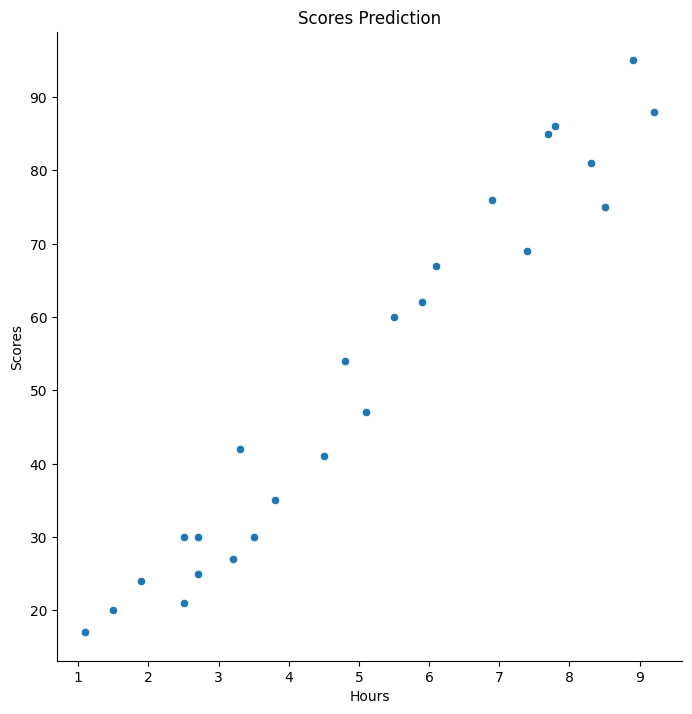

In [ ]:
# Plotting Persebaran Data
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

# **Feature Engineering**
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

In [ ]:
df = data.copy()

In [ ]:
# check duplicate data
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(f"Jumlah data setelah pemeriksaan duplikat: {df.shape}")

Jumlah data setelah pemeriksaan duplikat: (25, 2)


In [ ]:
# check missing value
df.isna().sum()

,0
Hours,0
Scores,0


Tidak ada missing value

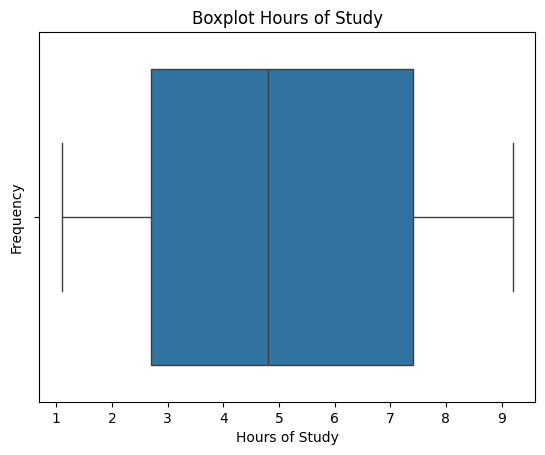

In [ ]:
# Check data outlier
# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of Study")
plt.ylabel("Frequency")
plt.title("Boxplot Hours of Study")

# Menampilkan plot
plt.show()

Tidak ditemukan outlier pada data dan akan dilanjutkan dengan membuat model machine learning dan membagi data menjadi X_train, y_train, X_test, dan y_test sebagai data target.

# **Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
y = data['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
# split data menjadi data train dan test dengan perbadingan 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=42)

# **Modeling Machine Learning Regression**

## **Linear Regression**

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

In [ ]:
X_train

array([[3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1]])

In [ ]:
y_train

,Scores
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24
21,54


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting Scores for the Test values
y_pred = lr_model.predict(X_test)

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1]])

In [ ]:
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

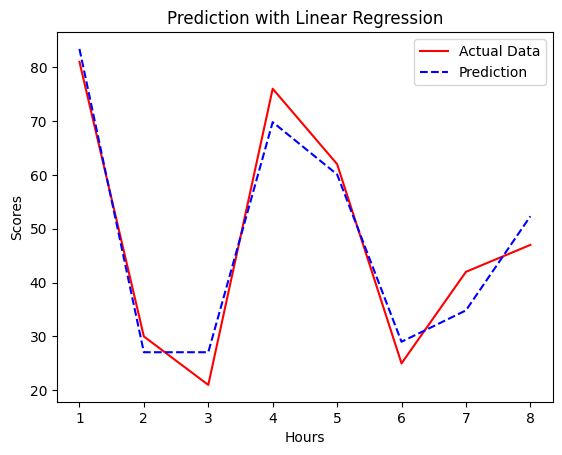

In [ ]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9487647340257012


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.794196676599803
Coefficient of the line Linear Regression: [9.71054094]


## **Decision Tree**

In [ ]:
# import library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting Scores for the Test values
y_pred_dt = dt_model.predict(X_test)

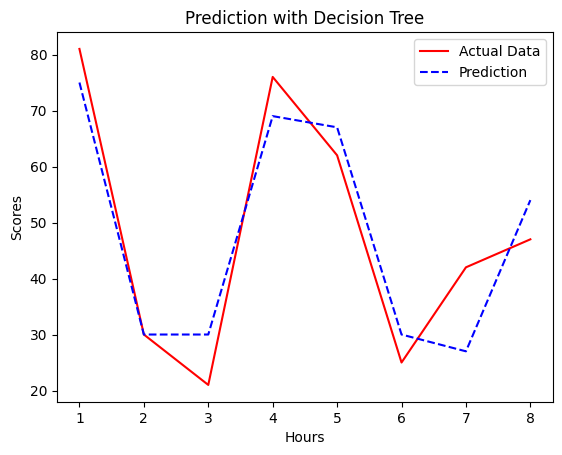

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

print('r square Decision Tree:',rsq_dt)

r square Decision Tree: 0.8671366594360087


## **Random Forest**

In [ ]:
#import library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dt_model = RandomForestRegressor()
dt_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicting Scores for the Test values
y_pred_rf = dt_model.predict(X_test)

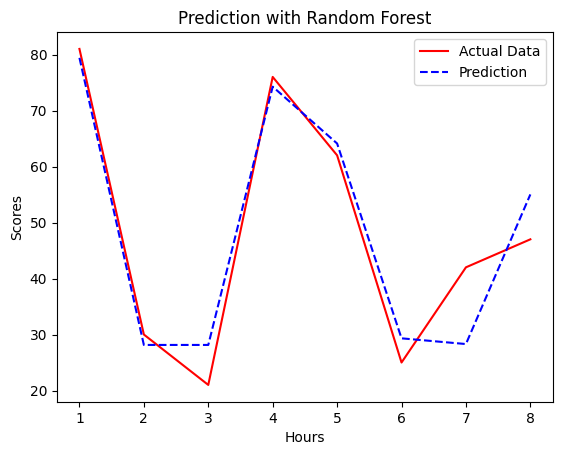

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

print('r square Random Forest:',rsq_rf)

r square Random Forest: 0.9091323752711497


# **Evaluasi Model**

In [ ]:
model = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor()
    }

for model_name, model_instance in model.items():
  model_instance.fit(X_train, y_train)
  y_pred_dt = model_instance.predict(X_test)

  rsq = r2_score(y_test,y_pred_dt)
  print(f'r square {model_name}: {rsq}')

r square Linear Regression: 0.9487647340257012
r square Decision Tree: 0.8671366594360087
r square Random Forest: 0.9118072125813449


nilai r squared dari 3 model yang telah dibuat, Model Linear Regression memiliki performa terbaik dengan nilai r square sebesar 0.9487.

# **Kesimpulan**

Setelah melakukan evaluasi model menggunakan metrik R-squared, dapat disimpulkan bahwa model Linear Regression memiliki performa paling baik di antara ketiga model yang telah dibuat. Oleh karena itu, untuk studi kasus memprediksi student scores berdasarkan hours of study, model Linear Regression adalah pilihan yang paling tepat.